# Working with Data 

<div class="alert alert-block alert-info">
<h2>Overview</h2>

Questions:

* How do I work with numerical data presented in tables?
* What is NumPy? What is pandas?
* What is an array? What is a dataframe?

Objectives:

* Use functions in `numpy` to read in tabular data.
* Take 2D slices of data in numpy arrays.
* Use 2D slices to work with particular rows or columns of data.
* Use the `range()` function in `for` loops.
* Use `numpy` functions to analyze data.
* Use `pandas` dataframes for more complex data.

</div>

Most scientists work with a lot of numerical data. In this module we will focus on reading in and analyzing numerical data, visualizing the data, and working with arrays.

## Reading in Tabular Data

In our last module, we used the `readlines()` function to read in a complex output file. In theory, you could always use the `readlines()` function, and then use the data parsing tools we learned in the previous module to format the data as you needed. But sometimes there are other ways that make more sense, particularly if the data is (1) all or mostly one type of data (for example, all numbers) and/or (2) formatted in a table. Frequently, a table will be mostly numbers, but have column or row labels.

A common table format is the CSV file or comma separated values. Data is presented in rows, with each value separated by a comma. If you have data in a spreadsheet program that you need to import into a python code, you can save the data as a .csv file to read it in.

In this example, we have a CSV file that contains data from a molecular dynamics trajectory. We have a 20 ns simulation that used a 2 fs timestep. The data was saved to the trajectory file every 1000 steps, so our file has 10,000 timesteps. At each timestep, we are interested in the distance between particular atoms. These trajectories were generated with the AMBER molecular dynamics program and the distances were measured with the python program MDAnalysis. The table of atomic distances was saved as a CVS file called “distance_data_headers.csv”. This file is included in the data folder. Open the file on ChemCompute to determine its structure.

In analyzing tabular data, we often need to perform the same types of calculations (averaging, calculating the minimum or maximum of the data set), so we are going to use a python library, in this case, one that contains lots of functions to perform math operations. This library is called `numpy`. The `numpy` library has several functions available to read in tabular data. One of these functions is the `genfromtxt()` function. We will use the `help()` function to learn more about `genfromtxt()` and how it works. The help function can be used for nearly any built in python function and many libraries. When `numpy` is imported, it is often shortened to `np` as shown below:

In [ ]:
import numpy as np      #commonly shortened name for library
help(np.genfromtxt) 

The help menu shows us all the options we can use with this function. The first input `fname` is the filename we are reading in. We must put a value for this option because it does not have a default value. All the other options have a default value that is shown after the = sign. We only need to specify these options if we don’t want to use the default value. For example, in our file, all the values were not numbers so we don’t want to use the datatype `float`, we want to use something else. If you have mixed datatypes, like we do here, we want to use `'unicode'`. In our file, our values are separated by commas; we indicate that with `delimiter=','`.

<div class="alert alert-block alert-success"> 
<strong>Should you skip the headers?</strong>

If you read the help information carefully, you may notice the `skip_header` option, where you can specify a number of lines to skip at the beginning of the file. If we did this, then our values would all be numbers and we could use dtype=’float’, which is the default. In this example, we are not going to do that because we might want to use the headers later to label things, but keep this option in mind because you might want to use it in a later project.

</div>  

Now we have have our plan, we are ready to import our data with `genfromtxt()`.

First, we have to get the path to our file. Remember from previous lessons that we use the `os.path` module to do this.

In [ ]:
import os

distance_file = os.path.join('data', 'distance_data_headers.csv')

distances = np.genfromtxt(distance_file, delimiter=',', dtype='unicode')
print(distances)

The output of this function is a list of lists; that is, each row is a entry in our list, but each row is itself a list of values. We can see that the first row is our column headings and all the other rows contain numerical data.

If we were to read this in with the readlines() function, we would have to split each line of the file, use the `append` function to make a new list for each row, and THEN put all those lists together into a list of lists. Using the appropriate `numpy` function makes our life much easier.

## Manipulating Tabular Data

Now we can clearly see that our first line of data is headings for our columns, and will need to be stored as strings, whereas all the rest of the data is numerical and will need to be stored as floats. Let’s take a slice of the data that is just the headers.

In [ ]:
headers = distances[0]
print(headers)

<div class="alert alert-block alert-warning"> 
<strong>Check your understanding</strong>
    
Take a slice of the data that contains all the numerical values. Replace the '0' in the statement below with the appropriate range.

</div>

In [ ]:
data = distances[0]
print(data)

Even though we now have a list of lists that is just the numbers, the numbers are all still strings. We know this because (1) we read them all in as unicode and (2) if we look at the output of the print statement, we can see that each number is enclosed in single quotes, indicating that it is a string. We need to recast these values as floats. The `numpy` library has a built-in function to accomplish this. In this case, keeping a variable with all the same information as strings is not useful to us, so this is a case where we are going to overwrite our variable data.

In [ ]:
data = data.astype(float)
print(data)

We already learned how to address a particular element of a list and how to take a slice of a list to create a new list. Now that we have an array, we now need two indices to address a particular element of the array. The notation to address an element of the array is always

```python
 array_name[row,column]

```
<div class="alert alert-block alert-warning"> 
<strong>Check your understanding</strong>
    
Before running the following cells, predict the outcome.
</div>


In [ ]:
print(data[0,1])
print(data[1,0])

You can also take two-dimensional slices of an array where you specify a range of rows and a range of columns for the slice. For example, sometimes it is easier to work with a small subset of our data for testing rather than the full data set. This command takes a slice that includes only the first ten rows and the first three columns of our data.

In [ ]:
small_data = data[0:10,0:3]
print(small_data)

Remember that counting starts at zero, so 0:10 means start at row zero and include all rows, up to but not including 10. Just as with the one-dimensional list slices, if you don’t include a number before the `:` the slice automatically starts with `list_name[0]`. If you don’t include a number after the `:` the slice goes to the end of the list. Therefore, if you don’t include either, a `:` means *every row* or *every column

Before running the following cells, predict the outcome.

In [ ]:
print(small_data[5,:])
print(small_data[:,1:])

## Analyzing Tabular Data

The `numpy` library has numerous built-in functions. For example, to calculate the average (mean) of a data set, the syntax is
```python
data_average = numpy.mean(data_set)
```

Let’s say we want to calculate the average distance for a particular measurement over the whole simulation. We want to calculate the average of one of the columns. We can take a slice of our data array that is just one column. Then we can find the average of that column. It doesn’t make sense to average the frame numbers, so let’s do the THR4_ATP column first.

In [ ]:
thr4_atp = data[:,1]  # Every row, just the THR4_ATP column
avg_thr4_atp = np.mean(thr4_atp)
print(avg_thr4_atp)


This is correct, but now we would like to calculate the average of every column. This seems like a job for a `for` loop, but unlike last time, we don’t want to count over a particular list and do something for every item, we want to do something a particular number of times. Basically, we want to take that `1` and let it be every number, up to the number of columns. This is a task for the `range()` function. The general syntax is
```python
range(start, end)

```
and we can use `range()` in a `for` loop.

In our example, the “end” value needs to be the number of columns of data.

<div class="alert alert-block alert-warning"> 
<strong>Check your understanding</strong>
    
Complete the code below to determine the number of columns in our data set using the `len` function. Save this value as a variable called num_columns.

</div>

In [ ]:
num_columns = 
print(num_columns)

Now that we know the number of columns, we can use the `range()` function to set up our `for` loop.

In [ ]:
for i in range(1,num_columns):
    column = data[:,i]
    avg_col = np.mean(column)
    print(F'{headers[i]} : {avg_col}')

## NumPy Arrays vs. Python Lists

When using `numpy` to import your data a special data type called a numpy array is created. This is similar to the built in list functions in python that were used in the previous activities, but numpy arrays take up less space, are faster, and have more mathematical operations associated with them. All elements in a numpy array must be the same type.

There are also differences in how lists and numpy arrays behave. Let’s look at some of these. We will start with reading in some data from an xyz file. The following block will read a file called water.xyz and saving two numpy arrays - one called coordinates with the molecular `coordinates`, and another called `symbols` with the element symbols.

In [ ]:
file_location = os.path.join('data', 'water.xyz')
xyz_file = np.genfromtxt(file_location, skip_header=2, dtype='unicode')
symbols = xyz_file[:,0]
coordinates = (xyz_file[:,1:])
coordinates = coordinates.astype(float)

print(symbols)
print(coordinates)


<div class="alert alert-block alert-warning"> 
<strong>Check your understanding</strong>
    
Slice the `coordinates` array to create a new array called `oxygen_coord` which has the x, y, and z coordinate for the oxygen atom.

</div>

Now that we have the oxygen coordinate, let’s imagine we wanted to do something to it. Let’s imagine that we wanted to translate the position of the oxygen atom. We want to translate it 0.1 units in the x direction and -0.1 units in the y direction.

If we were writing for loops like we did before, we might do this by defining a translation vector and using a for loop.

In [ ]:
translation_vector = [0.1, -0.1, 0]

oxygen_coord_new = []

for dim in range(3):
    new_position = oxygen_coord[dim] + translation_vector[dim]
    oxygen_coord_new.append(new_position)

print(oxygen_coord_new)


However, since `oxygen_coord` is a numpy array, we can easily perform element-wise operations on numpy arrays without loops. You can make your code much faster if you use numpy element-by-element operations instead of loops.

Numpy is smart. If two arrays (or a list and an array), it will guess that you want to do element-wise addition. In the `for` loop we just wrote, we actually wanted an answer that looked like `[x1+x2, y1+y2, z1+z2]` where [x1, x2, x3] was `oxygen_coord` and [y1, y2, y3] was `translation_vector`. Using the power of numpy arrays, we could have instead written

In [ ]:
oxygen_coord_new = oxygen_coord + translation_vector
print(oxygen_coord_new)


Numpy looked at the shape of both of these variables, saw they were the same shape, and assumed we wanted to do element-wise operation. You could have also subtracted, multiplied, or divided these, and it would have performed element-wise operations.

Note, that this only worked because `oxygen_coord` was a `numpy` array.

In [ ]:
type(oxygen_coord)

What happens if we try this with a list?

In [ ]:
oxygen_list = list(oxygen_coord)
type(oxygen_list)


In [ ]:
oxygen_list + translation_vector

This process is called concatenation, where the two lists are just joined together. As a note, if you wanted to concatenate the two where `oxygen_coordinate` was a numpy array, you could have done so with the `np.concatenate` function.

You can add two numpy arrays together, multiply arrays by scalars, or do element-wise multiplcation of arrays.

For example, you can multiply two numpy arrays to get their element-wise product. This means that given two vectors `a = np.array([a0, a1, a2])` and `b = np.array([b0, b1, b2])`, `a * b = [a0*b0, a1*a1, a2*b2]`.

In contrast, if `a`and `b` were lists, you would get an error.

<div class="alert alert-block alert-warning"> 
<strong>Check your understanding</strong>
    
Before running the follow cells, predict the outcome.

</div>


In [ ]:
a1 = np.array([2, 1, 0])
a2 = np.array([1, 3, 5])

print(a1 * a2)
print(a1 + a2)

In [ ]:
a1 = [2, 1, 0]
a2 = [1, 3, 5]

print(a1 + a2)
print(a1 * a2)

## Broadcasting

Another special thing about numpy is something called **broadcasting**. Broadcasting occurs when you attempt mathematical operations on arrays that have different shapes. If possible, the smaller array is “broadcast” across the larger array.

Let’s think about what would happen if we wanted to move every atom in our water molecule by our translation vector.

If you were working with Python lists, or you didn’t know about the features of numpy arrays, you might try to do this with a `for` loop.

In [ ]:
new_coordinates = []

for atom in coordinates:
    new_x = atom[0] + translation_vector[0]
    new_y = atom[1] + translation_vector[1]
    new_z = atom[2] + translation_vector[2]
    
    new_coordinates.append([new_x, new_y, new_z])
    
print(new_coordinates)


Broadcasting in `numpy` allows us to achieve that with one command, rather than a `for` loop.

In [ ]:
new_coordinates = coordinates + translation_vector

print(new_coordinates)

For this to work, we have to have two arrays that have a matching dimension. You can see the shape of an array using the function `np.shape`.

In [ ]:
np.shape(coordinates)

In [ ]:
np.shape(translation_vector)

When you typed, `coordinates + translation_vector`, numpy looked at the shapes of both arrays to figure out if they were compatible.

It starts with the dimensions to the right, so when it saw to matching 3’s it assumed you wanted to do element-wise operation this way, and stretched or ‘broadcast’ the smaller array to match the larger one.

## Logical comparisons

We can also do logical comparisons on whole arrays. For example, to find out if values in the array are greater than 0, we can write the following print statement, which will print either `True` or `False` for each array elelement depending on whehter it is greater than 0 or not.

In [ ]:
print(coordinates > 0)

To get every value in the array that is greater than 0, we can use this as a list of indices we want, or a slice.

In [ ]:
greater_than_0_values = coordinates[coordinates>0]
print(greater_than_0_values)

## Array Axes

Imagine we wanted to calculate the geometric center of our molecule. To do this, we would need to get the average x coordinate, the average y coordinate, and the average z coordinate.

A `numpy` array can be thought of like a coordinates system. Axis 0 runs along the ROWS, while axis 1 runs along the COLUMNS.

In [ ]:
coordinates

In [ ]:
center = np.mean(coordinates, axis=0) # mean of each column
print(center)


In [ ]:
center = np.mean(coordinates, axis=1) # mean of each row 
print(center)


<div class="alert alert-block alert-success"> 
<strong>Key Points</strong>


* NumPy arrays which are the same size use element-wise operations when added or subtracted
* NumPy uses something called broadcasting for arrays which are not the same size to allow arrays to be added or multiplied.
* NumPy has extensive documentation online - you should check this out if you need to do a computation.


</div>  


## What is pandas?

Pandas is another Python package which is very popular for data analysis. The key feature of pandas is the `dataframe`. Here we will discuss dataframes and some basic analysis.

NumPy is useful when you are working with data that is all numeric. Pandas, however, is capable of handling data of lots of different types. It is designed to make working with “relational” or “labeled” data easy and intuitive. Central to the `pandas` package are the special data structures called pandas Series and DataFrames. Pandas dataframes are 2 dimensional and tabular, and is particularly suited to data which is heterogenous and in columns, like an Excel spreadsheet. In fact, there are even functions which allow you to read data directly from excel spreadsheets (more on this later).

Pandas is built to closely work with NumPy. Many functions which work on NumPy arrays will also work on Pandas DataFrames.

First we need to load `pandas` it is often abbreviated as `pd`.

In [1]:
import pandas as pd


For this section, we will be working with a data set that contains information about the elements in the periodic table.The data is a csv (comma separated value) file from PubChem. 

### Reading Data

Once you have the file downloaded and saved in your directory, we will load it into pandas. This file is a csv (comma separated value) file, so we will load it using the `pd.read_csv` command.

In [2]:
periodic_data = pd.read_csv('data/PubChemElements_all.csv')

### Examining the Data

The variable `periodic_data` is now a pandas DataFrame with the information contained in the csv file. You can examine the DataFrame using the `.head()` method. This shows the first 5 rows stored in the DataFrame.

In [3]:
periodic_data.head()

,AtomicNumber,Symbol,Name,AtomicMass,CPKHexColor,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,OxidationStates,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,YearDiscovered
0,1,H,Hydrogen,1.008000,FFFFFF,1s1,2.20,120.0,13.598,0.754,"+1, -1",Gas,13.81,20.28,0.000090,Nonmetal,1766
1,2,He,Helium,4.002600,D9FFFF,1s2,NaN,140.0,24.587,NaN,0,Gas,0.95,4.22,0.000179,Noble gas,1868
2,3,Li,Lithium,7.000000,CC80FF,[He]2s1,0.98,182.0,5.392,0.618,+1,Solid,453.65,1615.00,0.534000,Alkali metal,1817
3,4,Be,Beryllium,9.012183,C2FF00,[He]2s2,1.57,153.0,9.323,NaN,+2,Solid,1560.00,2744.00,1.850000,Alkaline earth metal,1798
4,5,B,Boron,10.810000,FFB5B5,[He]2s2 2p1,2.04,192.0,8.298,0.277,+3,Solid,2348.00,4273.00,2.370000,Metalloid,1808


Pandas has read the data into a table. The first row of the file was used for column headers.

You can see the last 5 rows of the dataframe using the `.tail()` command. For example, to see the last 5 rows of our DataFrame, we would type

In [ ]:
periodic_data.tail()

You can also see information about the DataFrame using the `.info()` method.
* First, the data type is listed. This is a pandas DataFrame. Next, it tells us that we have 118 rows (118 entries) in the DataFrame.
* There are 17 columns of data
* Next, the name of each column along with the number of entries for that column, and the data type for that column. Note that for some columns, such as `Electronegativity`, there are fewer than 118 entries. This occurs because data is missing for some elements. When `pandas` read in our data file, it replaced these missing values with `NaN` (or ‘not a number’).


In [ ]:
periodic_data.info()

We can also see descriptive statistics easily using the `.describe()` command. The describe function lists the `mean`, `max`, `min`, standard deviation and percentiles for each column excluding `NaN` values.

In [ ]:
periodic_data.describe()

### Accessing data using row and column numbers

Pandas DataFrames are organized using columns and index for the rows.

To access data using the row number and column number, use the `.iloc` method. Data in pandas DataFrames can be accessed using slices in the same way as NumPy arrays using the `iloc` method.

In [ ]:
# This will access row 35 (counting starting at 0)
periodic_data.iloc[35]


Or use slices.

In [ ]:
periodic_data.iloc[35:45]


Like NumPy arrays, the second index is taken to be the column number.

In [ ]:
# This selects the row 1 and column 2.
periodic_data.iloc[1, 2]

<div class="alert alert-block alert-warning"> 
<strong>Check your understanding</strong>
    
Play around with using the iloc function to select different pieces of the data

Ideas (you do not have to do these):
* Select row 5
* Select rows 30 to the end.
* Select column 2 through 4 and rows 50 to the end, every other row.
</div>

### Accessing information by name

Indices in pandas can either be identified using numbers (as in the row number, similar to numpy arrays), or by name using column names and index names.

Unless otherwise specified in the `read_csv` command, pandas will use the first row of the file as column names. You can use these column names to access data in a particular column.

To see all of the column names, you can type

In [ ]:
periodic_data.columns

To access columns of data in pandas, you use the syntax
```python
dataframe_name['column name']
````
For example, to access the data in the Electronegativity column, we would use the syntax

In [ ]:
periodic_data['Electronegativity']

If you would like to select multiple columns of data, you put multiple column names in a list.

In [ ]:
periodic_data[['Name','Electronegativity']]

<div class="alert alert-block alert-warning"> 
<strong>Check your understanding</strong>
    
Select the columns ‘Name’, ‘AtomicMass’, and ‘StandardState’.

</div>

We have already discussed column names, but what about row names? By default, the names of the rows are the same as the numbers. You may have noticed that when you are printing your dataframes, there is an extra first column of numbers going from 0 to 118. These are the row names. Unless otherwise specified in the `read_csv` command, the row names will default to the row number.

To access rows using the row name, use the `.loc` method. Currently our row names and numbers are the same, so this does not look any different than using `iloc` if only one index is specified.

In [ ]:
periodic_data.loc[35]

However, now we can use the column name instead of the column number.

In [ ]:
periodic_data.loc[35, 'YearDiscovered']

Let’s see what happens when we change our index to one of our columns, so that we can use `loc` to access data by name. Imagine that we wanted to be able to access rows in our DataFrame using the element symbol. We will use the command `set_index` to do this. This will print your new DataFrame to the screen. You should notice that now the left most column is named ‘Symbol’ and lists the symbols for each element. Let’s try accessing `Kr` using `loc`.

In [ ]:
periodic_data.set_index('Symbol')

In [ ]:
periodic_data.loc['Kr']

It didn’t work! Why? Examine `periodic_data` again. The index is the same as before. This is because the `.set_index` method returns a new copy of the dataframe. If we wish to have later access to this copy, we have two options. 

1) We can capture the value in a variable (as in periodic_data_index = periodic_data.set_index('Symbol')). 

2) We might  chose to overwrite our existing dataframe. In pandas, you can do that by adding an additional argument to your `set_index` function. We can use the keyword argument `inplace=True`. When we use this argument, pandas will overwrite the original DataFrame. **Always look for this argument in pandas functions.**

In [ ]:
periodic_data_symbols = periodic_data.set_index('Symbol')
periodic_data_symbols.loc['Kr']

This lists all the information for the entry. Note the bottom, where it says `Name: Kr, dtype: object`. `Kr` is what we used for the index.

For option 2, overwiritng the dataframe could be done the following way:
```python
periodic_data.set_index('Symbol', inplace=True)
```
If you ever want change the index back it can be done one using

```python
periodic_data.reset_index(inplace=True)
```
This is a very important command. If you set another index without resetting the index, the `Symbol` column will be lost. This command reverts it back to a column.

### Broadcasting

Like NumPy arrays, pandas also takes advantage of broadcasting. You can add scalars or vectors to data easily.

For example, we could calculate the melting point in celsius

In [ ]:
periodic_data_symbols['MeltingPoint'] - 273.15

If you would like to capture this in a new DataFrame column, you can do so easily by putting the new column name in square brackets following the DataFrame name.

In [ ]:
periodic_data_symbols['MeltingPointC'] = periodic_data_symbols['MeltingPoint'] - 273.15

<div class="alert alert-block alert-warning"> 
<strong>Check your understanding</strong>
    
Make a new column in your DataFrame called ‘BoilingPointC’ where you have converted the boiling points from Kelvin to Celsius.

</div>

But what if we wanted to use a function instead of a scalar? Imagine you had written the function below, which converts temperatures in Kelvin to Fahrenheit.

In [ ]:
def kelvin_to_fahrenheit(kelvin_temp):
    fahrenheit = (kelvin_temp - 273.15) * 9/5 +32
    return fahrenheit

If you wanted to apply this function to every row, your first instinct might be to write a `for` loop. This would work, but pandas has a built in method called `apply` to easily allow you to do this.

When you call the `apply` method, you give it a function name which you would like to apply to every element of whatever you are using it on.

In [ ]:
# Calculate the boiling point in fahrenheit
periodic_data_symbols['BoilingPoint'].apply(kelvin_to_fahrenheit)

In [ ]:
# Save as a new column
periodic_data['BoilingPointF'] = periodic_data['BoilingPoint'].apply(kelvin_to_fahrenheit)

### Saving your new dataframe

If you wanted to save your data as a csv, you could do it using the command `to_csv`. Run this command and verify the new file is generated.

In [ ]:
periodic_data_symbols.to_csv('periodic_data_processed.csv')

### Filtering and sorting your DataFrame

You can use the function `.query` to query your data. You type a logical expression in a string inside of the function.

For example, to find all of the elements with a melting point greater than 298.

In [ ]:
periodic_data.query('MeltingPoint > 298')

You can combine several statements, or use to compare two columns.

In [ ]:
periodic_data.query('MeltingPoint > 298 and BoilingPoint < 500')


In [ ]:
periodic_data.query('MeltingPoint > BoilingPoint')


To sort data, you can use the `sort_values` function.

This will sort the rows (axis=0) by the values in the ‘MeltingPoint’ column. If you are familiar with Excel, this is similar to how spreadsheets are sorted if you sort based on one of the columns. This sort will return a DataFrame where elements with the lowest melting point are listed first.



In [ ]:
periodic_data.sort_values(by='MeltingPoint')

## Plotting with Pandas

One way to examine data visually is looking at a histogram plot.

Pandas DataFrames have several built-in plotting functions, one of which is `.hist`. If we call this function on just a DataFrame, it will make a histogram for each column of data.

In our case, we are interested in the histogram for the boiling point.

array([[<Axes: title={'center': 'BoilingPoint'}>]], dtype=object)

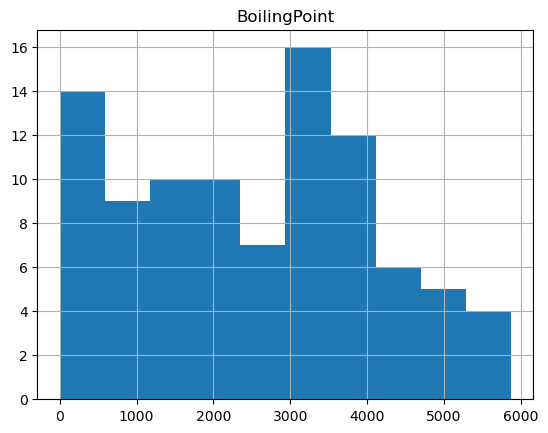

In [4]:
periodic_data.hist(column='BoilingPoint')

It is also possible to plot data from a histogram based on categorical data. In this case we use the column containing the Standard State.

In [ ]:
periodic_data.hist(column='BoilingPoint', by='StandardState')

As you can see that this is a little hard to read. It would be possible to make this plot more readable, but we will not cover that in this lesson.

Another plotting option you might have chosen for this data was a boxplot

In [ ]:
periodic_data.boxplot(column='BoilingPoint', by='StandardState', rot=90)

<div class="alert alert-block alert-success"> 
<strong>Key Points</strong>


* Pandas stores data in a structure called a dataframe
* Pandas can read data that has lots of different data types.
* You can easily get statistics from a dataframe by using methods like df.describe()



</div>  